## AI Academic Advisor: Web Scraping - Data Cleaning - Data Manipulation

### Introduction to Data Manipulation for AI Academic Advisor

To build an intelligent academic advising system for the AI Academic Advisor, I conducted web scraping to collect structured data on courses and majors offered at the University of Illinois at Urbana-Champaign. This process allowed me to automate the retrieval of relevant academic information and organize it for efficient use in the system.

The data manipulation process involved:

Web Scraping Majors:
- Extracted a list of LAS and Grainger Engineering majors from university sources.
- Cleaned and structured the data to ensure accuracy and consistency.
- Removed duplicates and irrelevant entries to focus on relevant programs.

Web Scraping Courses:
- Collected course listings, including course names, descriptions, and relevant attributes.
- Processed and formatted the course data into a structured dataframe for easy access.
- Ensured that course details align with major requirements and student preferences.

Organizing and Cleaning Data:
- Standardized the scraped datasets into clear dataframes, making them suitable for further analysis.
- Formatted course and major data for smooth integration with the AI-driven recommendation system.
- By successfully scraping and organizing this data, I have created a solid foundation for the AI Academic Advisor to provide accurate, structured academic information to students.

### Web Scraping

In [1]:
import requests
import json
import pandas as pd

# 🔹 Replace with your actual API URL
api_url = "https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/data/out_full.json"

# 🔹 Headers (copy from DevTools if needed)
headers = {
    "User-Agent": "Mozilla/5.0",
    "Referer": "https://courses.illinois.edu/",
    "Accept": "application/json"
}

# 🔹 Fetch JSON data
response = requests.get(api_url, headers=headers)

# 🔹 Parse JSON
if response.status_code == 200:
    data = response.json()
else:
    print(f"Error {response.status_code}: Failed to fetch data")
    exit()


In [3]:
course_list = []

for course in data:
    course_code = course.get("course", "Unknown Course")

    # Each instructor represents a different section of the class
    if "instructors" in course and isinstance(course["instructors"], list):
        for instructor_data in course["instructors"]:
            course_title = instructor_data.get("Course Title", "No Title")
            course_subject = instructor_data.get("Course Subject", "Unknown Subject")
            instructor = instructor_data.get("instructor", "No Instructor")
            section_count = instructor_data.get("sections", "N/A")
            avg_gpa = instructor_data.get("avgGPA", "N/A")
            students_enrolled = instructor_data.get("countGPA", "N/A")  # Number of students who got a GPA

            # Append data as a separate row for each section+professor
            course_list.append({
                "Course Code": course_code,
                "Title": course_title,
                "Subject": course_subject,
                "Instructor": instructor,
                "Sections": section_count,
                "Students Enrolled": students_enrolled,
                "Average GPA": avg_gpa
            })

In [4]:
# 🔹 Convert to DataFrame and Save
courses_df = pd.DataFrame(course_list)
courses_df.to_csv("uiuc_courses.csv", index=False)

print(f"The length of the dataframe created is {len(courses_df)}")
courses_df.head()

The length of the dataframe created is 11312


,Course Code,Title,Subject,Instructor,Sections,Students Enrolled,Average GPA
0,AAS 100,Intro Asian American Studies,AAS,All Sections,87,2339,3.466451
1,AAS 100,Intro Asian American Studies,AAS,"Shin, J.",4,94,3.737979
2,AAS 100,Intro Asian American Studies,AAS,"Rosado-Torres, A.",3,80,3.733750
3,AAS 100,Intro Asian American Studies,AAS,"Horton, C.",4,112,3.678661
4,AAS 100,Intro Asian American Studies,AAS,"Boonsripaisal, S.",8,241,3.672324


**Scraping the Data:** I used the requests library to send an HTTP GET request to an API endpoint containing grade disparity data for UIUC courses. The request included headers to mimic a real browser request and ensure access.

**Observing the Data Format:** After retrieving the JSON response, I examined the structure, particularly focusing on course codes, instructors, sections, and GPA-related information. This helped identify how the data was nested and what needed to be extracted.

**Creating the Proper List:** I initialized an empty list (course_list) and iterated through the JSON data, extracting relevant fields such as course code, title, subject, instructors, section count, and GPA details. Each instructor was treated as a unique entry to ensure accurate representation.

**Appending Data into a DataFrame:** For each course and instructor, I stored the extracted information as a dictionary and appended it to course_list. This structured list was then converted into a pandas DataFrame for easier manipulation and analysis.

In [5]:
full_courses_df = courses_df[courses_df["Instructor"] == "All Sections"]
courses_df.drop(courses_df[courses_df["Instructor"] == "All Sections"].index, inplace=True)

full_courses_df.head(10)

,Course Code,Title,Subject,Instructor,Sections,Students Enrolled,Average GPA
0,AAS 100,Intro Asian American Studies,AAS,All Sections,87,2339,3.466451
20,AAS 120,Intro to Asian Am Pop Culture,AAS,All Sections,2,61,3.525246
23,AAS 200,U.S. Race and Empire,AAS,All Sections,6,196,3.531020
29,AAS 215,US Citizenship Comparatively,AAS,All Sections,6,186,3.682796
39,ABE 100,Intro Agric & Biological Engrg,ABE,All Sections,4,139,3.707266
56,ABE 469,Industry-Linked Design Project,ABE,All Sections,4,133,3.661955
63,ACCY 200,Fundamentals of Accounting,ACCY,All Sections,29,4747,3.381957
68,ACCY 201,Accounting and Accountancy I,ACCY,All Sections,64,4868,3.033989
73,ACCY 202,Accounting and Accountancy II,ACCY,All Sections,64,4254,3.244661
82,ACCY 301,Atg Measurement & Disclosure,ACCY,All Sections,69,1965,3.305552


In [6]:
courses_df.head(10)

,Course Code,Title,Subject,Instructor,Sections,Students Enrolled,Average GPA
1,AAS 100,Intro Asian American Studies,AAS,"Shin, J.",4,94,3.737979
2,AAS 100,Intro Asian American Studies,AAS,"Rosado-Torres, A.",3,80,3.733750
3,AAS 100,Intro Asian American Studies,AAS,"Horton, C.",4,112,3.678661
4,AAS 100,Intro Asian American Studies,AAS,"Boonsripaisal, S.",8,241,3.672324
5,AAS 100,Intro Asian American Studies,AAS,"Uhall, M.",4,119,3.605462
6,AAS 100,Intro Asian American Studies,AAS,"Zheng, R.",9,227,3.518634
7,AAS 100,Intro Asian American Studies,AAS,"Atienza, P.",4,107,3.511028
8,AAS 100,Intro Asian American Studies,AAS,"Guruparan, A.",4,111,3.474865
9,AAS 100,Intro Asian American Studies,AAS,"Park, D.",4,132,3.472121
10,AAS 100,Intro Asian American Studies,AAS,"Wang, Y.",12,302,3.451523


In [7]:
import requests
from bs4 import BeautifulSoup
import spacy
import pandas as pd
import time

# Load NLP model for keyword extraction
nlp = spacy.load("en_core_web_sm")

# Function to extract major details
def get_major_details(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract Major Name
    major_name_tag = soup.find("h1", class_="major-h1")
    major_name = major_name_tag.text.strip() if major_name_tag else "Unknown Major"

    # Extract Description
    desc_section = soup.find("div", class_="programDescription")
    description = desc_section.find("p").text.strip() if desc_section else "No description found."

    # Extract Career Options
    career_section = soup.find("div", class_="programCareerExamples")
    career_list = career_section.find_all("li") if career_section else []
    career_options = [career.text.strip() for career in career_list] if career_list else ["No career options listed."]

    # Extract Related Majors
    related_majors_section = soup.find("div", class_="relatedMajors")
    related_majors = [
        link.text.strip() for link in related_majors_section.find_all("a", class_="data-description")
    ] if related_majors_section else ["No related majors found."]

    return major_name, description, career_options, related_majors

# Function to extract keywords using NLP
def extract_keywords(text):
    doc = nlp(text.lower())  # Convert text to lowercase
    keywords = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return list(set(keywords))  # Remove duplicates

# Store scraped data
major_data = []

# List of major links (Replace this with your full list)
major_links = [
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0323BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP6131BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP5532BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM0071BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM6077BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4081BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0461BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KT0277BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP4048BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV1008BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5003BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5006BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5163BSAG",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP5163BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/ACE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL6080BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5736BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/ALEC",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL0177BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL0002BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0340NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4091BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5720BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0169BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5896BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5526BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4090NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL5621NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5526BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0333BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6072BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6075BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6072BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0334BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0342BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KY5460BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0150BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL6143BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KL0048BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR6142BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0127BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10LP5695BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10LP6074BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM5597BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0438BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV3865BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0305BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KT0278BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KY0351BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0156BLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5246NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0286BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5167BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KN5391BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR4084BFA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0301BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV6039BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5646BMA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM5073BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM1432BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0130BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0439NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV1438BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0133BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0318BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KT5201BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0408BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KN5422BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0314NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0433BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5876BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0265BA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM6146BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0159BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KM0070NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0168BME",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0300BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0158BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR5045BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0106BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0161BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0308NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR0157BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5164BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KR1481BMUS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP5183BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0332BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KP0240BS",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0343NONE",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0306BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5197BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV4097BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV5459BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0344BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0307BALA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0329BSLA",
    "https://myillini.illinois.edu/Programs/MajorDetail/10KV0464BSLA"
]

for url in major_links:
    details = get_major_details(url)
    if details:
        major_name, description, career_options, related_majors = details

        # Extract keywords from description
        description_keywords = extract_keywords(description)

        major_data.append({
            "Major": major_name,
            "Description": description,
            "Keywords": ", ".join(description_keywords),
            "Career Options": ", ".join(career_options),
            "Related Majors": ", ".join(related_majors)
        })

    time.sleep(1)  # Add delay to prevent rate limiting

# Convert to DataFrame
major_data_df = pd.DataFrame(major_data)

# Save to CSV and JSON
major_data_df.to_csv("major_keywords_fixed.csv", index=False)
major_data_df.to_json("major_keywords_fixed.json", orient="records", indent=4)


In [15]:
major_data_df.head()

,Major,Description,Keywords,Career Options,Related Majors,Cluster
0,Neuroscience,Neuroscience is the study of the nervous syste...,"integrative, neurophysiology, led, teaches, ne...","Physician, Physical Therapist, Speech Therapis...","Biochemistry - LAS, Integrative Biology - LAS,...",4
1,Neural Engineering,Neural engineers apply engineering principles ...,"individual, design, graduation, monitoring, mo...","Healthcare Engineer, Neuroengineer, Data Platf...","Bioengineering - ENG, Biology - LAS, Electrica...",4
2,Systems Engineering and Design,This major provides a solid foundation in math...,"new, field, systems, major, curriculum, roboti...","Administration, Automotive, control systems, &...","Engineering Mechanics - ENG, Materials Science...",0
3,Accountancy,"Accountancy is about the recording, analysis, ...","pursuing, degree, solve, prepare, problems, ma...","Corporate accounting, Forensic consulting, Gov...","Accountancy + Data Science - BUS, Agri-Account...",0
4,Accountancy + Data Science,All business is being transformed by technolog...,"combine, degree, natural, analyzing, transfer,...","Financial modeling & research, Data science fi...","Accountancy - BUS, Astronomy + Data Science - ...",2


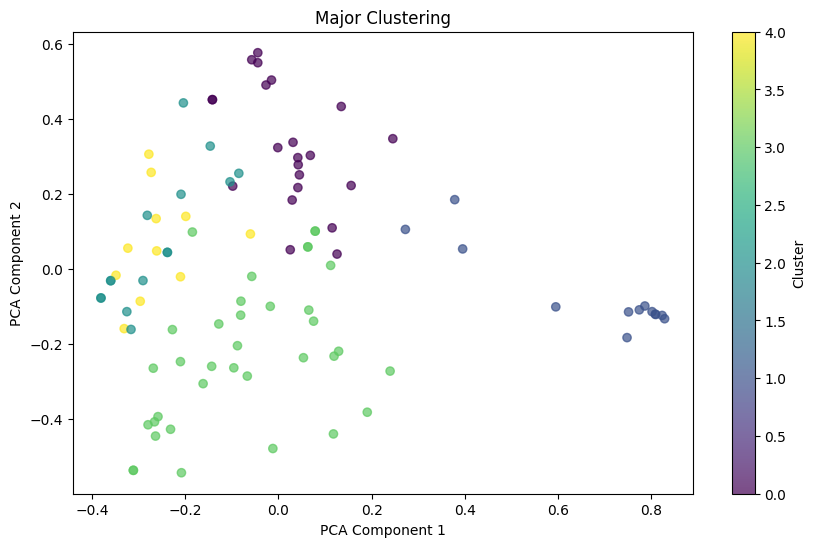

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(major_data_df["Related Majors"])

# Reduce dimensionality with TruncatedSVD (better for sparse matrices)
svd = TruncatedSVD(n_components=50)
X_reduced = svd.fit_transform(X)

# Apply PCA after SVD for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)

# Apply Clustering (if "Cluster" column doesn't exist)
if "Cluster" not in major_data_df.columns:
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Adjust number of clusters as needed
    major_data_df["Cluster"] = kmeans.fit_predict(X_reduced)

# Plot Clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=major_data_df["Cluster"], cmap='viridis', alpha=0.7)
plt.title("Major Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()
